# Examples of poison setups and Badnets implementation

Cleaned up version of explore notebook

In [1]:
import pickle
import PIL
from IPython.display import Image 
import torch, torchvision

In [2]:
poison_setups = 'poison_setups/cifar10_transfer_learning.pickle'
#poison_setups = 'poison_setups/cifar10_from_scratch.pickle'
#poison_setups = 'poison_setups/tinyimagenet_transfer_learning.pickle'
#poison_setups = 'poison_setups/tinyimagenet_from_scratch.pickle'

In [3]:
with open(poison_setups, "rb") as handle:
    setup_dicts = pickle.load(handle)

In [5]:
setup_dicts[0]

{'target class': 4,
 'target index': 9139,
 'base class': 7,
 'base indices': array([30330,  7829, 47673, 14780, 41050, 37670, 20223, 41973, 21599,
        33265, 40426, 25213, 10643, 23609, 19553, 41843, 44560, 18517,
        17023, 14400, 40330, 26767, 42366, 34367, 44798])}

In [7]:
def getTrial(n, attack):
    with open(f'poison_examples/cifar10-transfer/{attack}_poisons/num_poisons=25/{n}/base_indices.pickle','rb') as handle:
        base = pickle.load(handle)
    with open(f'poison_examples/cifar10-transfer/{attack}_poisons/num_poisons=25/{n}/target.pickle','rb') as handle:
        target = pickle.load(handle)
    with open(f'poison_examples/cifar10-transfer/{attack}_poisons/num_poisons=25/{n}/poisons.pickle','rb') as handle:
        poisons= pickle.load(handle)
    return base, target, poisons

In [9]:
htbd_base, htbd_target, htbd_poisons = getTrial(0, 'htbd')

In [15]:
htbd_base #Why don't these match with setup_dicts[0]?

array([33922, 11944, 30575, 17174, 42674,  5649, 24476, 13194, 24587,
       42204,  8515, 43220, 17865,  4567, 24374, 39691, 43775, 28408,
        4079, 48516, 40761, 41842, 35626, 49004, 25820])

In [21]:
badnets_base, badnets_target, badnets_poisons = getTrial(0, 'badnets')

In [23]:
badnets_base #This matches with setup_dicts[0]

array([30330,  7829, 47673, 14780, 41050, 37670, 20223, 41973, 21599,
       33265, 40426, 25213, 10643, 23609, 19553, 41843, 44560, 18517,
       17023, 14400, 40330, 26767, 42366, 34367, 44798])

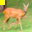

In [30]:
badnets_poisons[0][0] #Yellow square trigger at top left corner